#### About

> Cluster analysis

Cluster analysis is a method used to group similar objects or observations into clusters based on their similarities or distances. The objective is to create homogeneous groups that differ from each other, and thus, the observations within each cluster should be as similar as possible.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Load the iris dataset
iris = sns.load_dataset('iris')


In [3]:
# Separate the features from the target variable
X = iris.drop('species', axis=1)

In [4]:
# Scale the features to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Use PCA to reduce the dimensions of the features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [6]:
# Use the elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)


/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

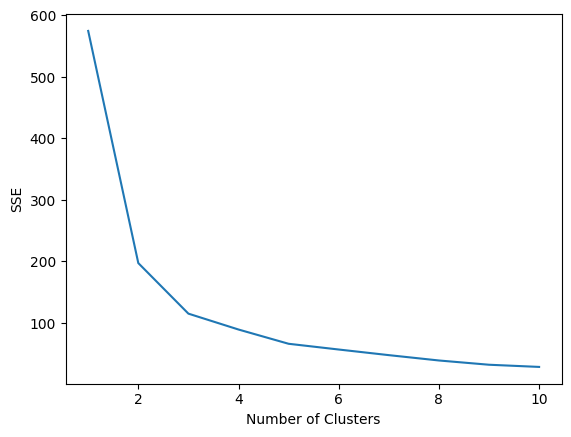

In [7]:
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


In [8]:
# Apply k-means clustering algorithm to form 3 clusters - elbow at 3
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_pca)

/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [9]:
# Visualize the clusters
iris_clustered = iris.copy()
iris_clustered['cluster'] = kmeans.labels_


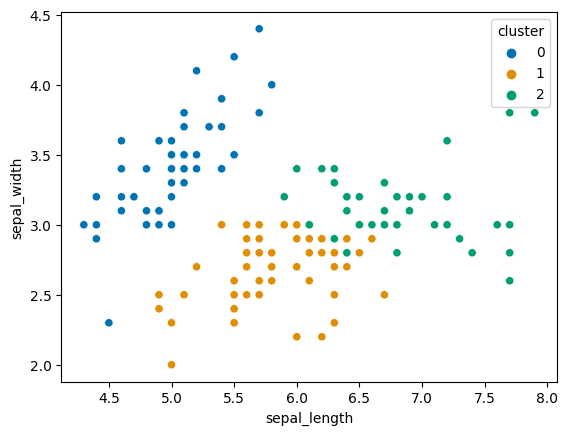

In [10]:
sns.scatterplot(data=iris_clustered, x='sepal_length', y='sepal_width', hue='cluster', palette='colorblind')
plt.show()

Cluster analysis has a wide range of applications in real-world scenarios, including:

Market segmentation: dividing customers into different groups based on their similarities in preferences, demographics, and behavior to provide targeted marketing.

Image segmentation: grouping similar pixels together in images to extract meaningful features or objects.

Anomaly detection: identifying unusual or abnormal behavior in network traffic, financial transactions, or medical diagnosis.

Social network analysis: identifying groups or communities of users with similar interests or behavior in social media networks.

Customer segmentation: identifying groups of customers with similar behaviors or purchase patterns to improve customer retention and increase sales.

Fraud detection: identifying groups of transactions with similar patterns to detect fraudulent activity.